<a href="https://colab.research.google.com/github/Reshmykris/Day12_DS_ML/blob/main/Day12_DS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Import dataset

dataset = pd.read_csv("/content/Social_Network_Ads.csv")

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [7]:
#Split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
#Impl StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [18]:
#Impl kNN Algo

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski') #minkowski - distance measure

classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [19]:
#Predict test set results

y_pred = classifier.predict(x_test)

In [20]:
#Confusion matrix and accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[48  3]
 [ 7 22]]


0.875

In [21]:
#Visualization the training set

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train


In [22]:
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() +0, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.25))

In [23]:
#2 r n dim data into flattened dim, using ravel() function, T is transform
prob = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


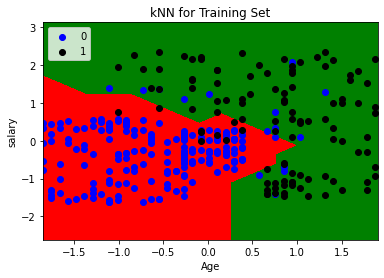

In [24]:
plt.contourf(x1, x2, prob, cmap = ListedColormap(("red", "green")))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# i = x_set, j = y_set
for i, j  in enumerate(np.unique(y_test)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("blue", "black"))(i), label = j)

plt.title("kNN for Training Set")
plt.xlabel("Age")
plt.ylabel("salary")

plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


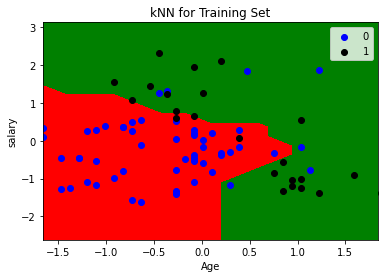

In [25]:
#Visualization the training set

from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() +0, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.25))

#2 r n dim data into flattened dim, using ravel() function, T is transform
prob = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, prob, cmap = ListedColormap(("red", "green")))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# i = x_set, j = y_set
for i, j  in enumerate(np.unique(y_test)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("blue", "black"))(i), label = j)

plt.title("kNN for Training Set")
plt.xlabel("Age")
plt.ylabel("salary")

plt.legend()
plt.show()